<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/Classification/Classification/decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importing the dataset

In [3]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/Classification/Classification/Data.csv'

# get the dataset
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
a_score = accuracy_score(y_test, y_pred)
# track model comparison

model_comp = dict()
model_comp['Decision Tree confusion matrix'] = cm
model_comp['Decision Tree accuracy'] =a_score

print(model_comp)

{'Decision Tree confusion matrix': array([[103,   4],
       [  3,  61]]), 'Decision Tree accuracy': 0.9590643274853801}


<function matplotlib.pyplot.show(close=None, block=None)>

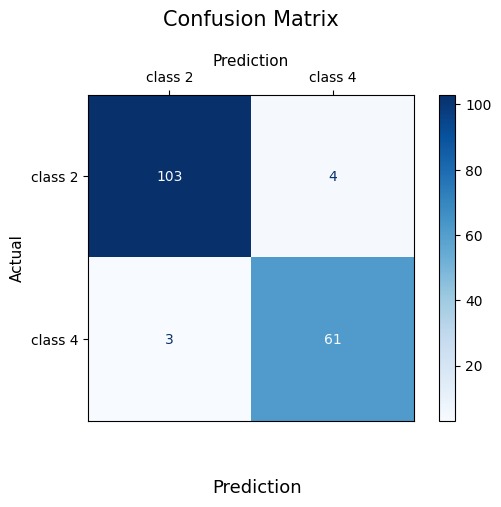

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#classes = classifier.classes_
# set up display labels to target class names
target_names = ['class 2', 'class 4']

#cm = confusion_matrix(y_test, y_pred, labels=classes)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show

In [16]:

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 2       0.97      0.96      0.97       107
     class 4       0.94      0.95      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

